<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/Copy_of_STP_AIML_Module_6_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing forward propagation and back propagation

In this lab, we implement forward and backpropagation to train an neural network from scratch for a simple binary classification problem using gradient descent. We also see how the network's training process looks like using both synthetic and real-world data from scikit-learn, including visualizations of performance and loss curves.

# Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Example dataset generation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Now let us define Python functions for the sigmoid and ReLU activation functions, along with their derivatives.

In [2]:
def sigmoid(Z):
    """
    Computes the sigmoid activation of Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The activated output.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    A = 1 / (1 + np.exp(-Z))
    return A

def sigmoid_derivative(A):
    """
    Computes the derivative of the sigmoid activation with respect to Z.
    Assumes A is the output of the sigmoid function (A = sigmoid(Z)).

    Args:
        A (np.ndarray): The activated output from the sigmoid function.
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The derivative of the sigmoid function.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    return A * (1 - A)

def relu(Z):
    """
    Computes the ReLU activation of Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The activated output.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    A = np.maximum(0, Z)
    return A

def relu_derivative(Z):
    """
    Computes the derivative of the ReLU activation with respect to Z.

    Args:
        Z (np.ndarray): The input array (pre-activation values).
                        Shape: (n_neurons_current_layer, n_samples)

    Returns:
        np.ndarray: The derivative of the ReLU function.
                    Shape: (n_neurons_current_layer, n_samples)
    """
    return (Z > 0).astype(float)

In [3]:
def forward_pass(X, W, b, activation_fn):
    """
    Computes the forward pass for a single layer.

    Args:
        X (np.ndarray): Input data or activated output from the previous layer.
                        Shape: (n_features_previous_layer, n_samples)
        W (np.ndarray): Weights matrix for the current layer.
                        Shape: (n_neurons_current_layer, n_features_previous_layer)
        b (np.ndarray): Bias vector for the current layer.
                        Shape: (n_neurons_current_layer, 1)
        activation_fn (function): The activation function to apply (e.g., sigmoid, relu).

    Returns:
        np.ndarray: The activated output of the current layer.
                    Shape: (n_neurons_current_layer, n_samples)
        np.ndarray: The pre-activation value Z (linear transformation output).
                    Shape: (n_neurons_current_layer, n_samples)
    """

    Z = np.dot(W, X) + b
    A = activation_fn(Z)
    return A, Z

In [4]:
np.random.seed(42)
n_features_input = 5
n_samples_example = 100
X_example = np.random.randn(n_features_input, n_samples_example)
n_neurons_hidden = 10
W_hidden_example = np.random.randn(n_neurons_hidden, n_features_input) * 0.01
b_hidden_example = np.zeros((n_neurons_hidden, 1))
A_hidden_example, Z_hidden_example = forward_pass(X_example, W_hidden_example, b_hidden_example, relu)
print(f"Looking at how Forward Pass happens")
print(f"Input X shape: {X_example.shape}")
print(f"Weights W shape: {W_hidden_example.shape}")
print(f"Bias b shape: {b_hidden_example.shape}")
print(f"Pre-activation Z shape: {Z_hidden_example.shape}")
print(f"Activated output A shape: {A_hidden_example.shape}")
n_features_output_layer = n_neurons_hidden
n_neurons_output = 1
W_output_example = np.random.randn(n_neurons_output, n_features_output_layer) * 0.01
b_output_example = np.zeros((n_neurons_output, 1))
A_output_example, Z_output_example = forward_pass(A_hidden_example, W_output_example, b_output_example, sigmoid)
print(f"\nDemonstrating Forward Pass for Output Layer")
print(f"Input X (from hidden layer) shape: {A_hidden_example.shape}")
print(f"Weights W shape: {W_output_example.shape}")
print(f"Bias b shape: {b_output_example.shape}")
print(f"Pre-activation Z shape: {Z_output_example.shape}")
print(f"Activated output A shape: {A_output_example.shape}")

Looking at how Forward Pass happens
Input X shape: (5, 100)
Weights W shape: (10, 5)
Bias b shape: (10, 1)
Pre-activation Z shape: (10, 100)
Activated output A shape: (10, 100)

Demonstrating Forward Pass for Output Layer
Input X (from hidden layer) shape: (10, 100)
Weights W shape: (1, 10)
Bias b shape: (1, 1)
Pre-activation Z shape: (1, 100)
Activated output A shape: (1, 100)


## Backward Propagation

Now let us understand mathematics behind backpropagation using the chain rule to calculate gradients for weights and biases. Implement the backward pass in Python, highlighting tensor shapes for all gradient calculations.


In [7]:
def backward_pass(dA, Z, A_prev, W, activation_derivative_fn, m):
    """
    Computes the backward pass for a single layer.

    Args:
        dA (np.ndarray): Gradient of the cost with respect to the activation of the current layer.
                         Shape: (n_neurons_current_layer, n_samples)
        Z (np.ndarray): Pre-activation value of the current layer.
                        Shape: (n_neurons_current_layer, n_samples)
        A_prev (np.ndarray): Activated output from the previous layer (input to current layer).
                             Shape: (n_features_previous_layer, n_samples)
        W (np.ndarray): Weights matrix for the current layer.
                        Shape: (n_neurons_current_layer, n_features_previous_layer)
        activation_derivative_fn (function): The derivative of the activation function to apply.
        m (int): Number of samples.

    Returns:
        tuple: A tuple containing:
            - dA_prev (np.ndarray): Gradient of the cost with respect to the activation of the previous layer.
                                    Shape: (n_features_previous_layer, n_samples)
            - dW (np.ndarray): Gradient of the cost with respect to the weights W.
                               Shape: (n_neurons_current_layer, n_features_previous_layer)
            - db (np.ndarray): Gradient of the cost with respect to the biases b.
                               Shape: (n_neurons_current_layer, 1)
    """
    dZ = dA * activation_derivative_fn(Z)
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ) # Added this line
    return dA_prev, dW, db

In [8]:
np.random.seed(43)
Y_example = np.random.randint(0, 2, size=(n_neurons_output, n_samples_example))
dZ_output_initial = (A_output_example - Y_example) / n_samples_example
print(f"\nDemonstrating Backward Pass for Output Layer")
print(f"Target Y shape: {Y_example.shape}")
print(f"Initial dZ_output shape (from Loss derivative): {dZ_output_initial.shape}")

# The backward_pass function expects dA (gradient of cost w.r.t. activation of current layer).
# For the output layer, if we use the simplified dZ_output_initial, we effectively bypass dA and activation_derivative_fn.
# However, to use the generic backward_pass, let's treat dZ_output_initial as dA for the sigmoid activation derivative
# and then compute dA_output using the sigmoid_derivative for consistency.
# This is a bit of an adaptation, as typically dZ = dA * g'(Z) and here we have dZ directly.
# To fit the `backward_pass` function signature, we can set dA for the output layer
# to be such that when multiplied by sigmoid_derivative(Z_output_example) it gives dZ_output_initial.
# So, dA_output = dZ_output_initial / sigmoid_derivative(Z_output_example)
# But a more direct way for the output layer gradient calculation, if using BCE+Sigmoid, is that dZ is directly (A-Y)/m.
# Let's adjust the `backward_pass` call slightly or explicitly define dA for the output.
# If dA_output represents dL/dA_output, then dZ_output = dA_output * sigmoid_derivative(Z_output_example).
# For BCE with Sigmoid, dZ_output is (A-Y)/m. So, dA_output would be dZ_output / sigmoid_derivative(Z_output).

# Let's compute dA_output based on dZ_output_initial for the output layer:
# dZ_output = dA_output * sigmoid_derivative(Z_output_example)
# so dA_output = dZ_output / sigmoid_derivative(Z_output_example)
# Note: division by zero could occur if sigmoid_derivative(Z_output_example) is 0, which happens at extremes of Z.
# For stability, we can calculate dZ_output directly for the output layer
# and then feed it into the rest of the backward pass steps.

# Let's explicitly compute dZ_output for the output layer
dZ_output = (A_output_example - Y_example) / n_samples_example

# Now, use the backward_pass function for the output layer.
# The function expects 'dA', 'Z', 'A_prev', 'W', 'activation_derivative_fn', 'm'
# For the output layer: dA is conceptually dL/dA_output which we can derive from dZ_output.
# dA_output = dZ_output / sigmoid_derivative(Z_output_example) is how we'd get dA if we started from dZ.
# However, our backward_pass expects dA. So if dZ_output is (A_output-Y)/m,
# then dA_output (dL/dA_output) is (A_output - Y) / (m * A_output * (1 - A_output))
# Let's use dZ_output directly as dA for the backward_pass for simplicity, as it correctly carries the error signal.

# When working with BCE + Sigmoid, dL/dZ = (A-Y)/m is often derived directly.
# So we can effectively set dA for the output layer in `backward_pass` to be `dZ_output` and pass `lambda x: 1` as activation derivative.
# Or, more correctly, dA = dL/dA. We know dZ = dL/dA * dA/dZ. For sigmoid, dA/dZ = A(1-A).
# So, dA = dZ / (A_output * (1 - A_output))

# Let's define dA_output carefully: dL/dA_output = (A_output_example - Y_example) / (n_samples_example * sigmoid_derivative(Z_output_example)) is incorrect.
# For BCE, dL/dA = -(Y/A) + (1-Y)/(1-A).
# So dL/dA_output = (A_output_example - Y_example) / (A_output_example * (1 - A_output_example))
# This is dA_output. Then dZ_output = dA_output * sigmoid_derivative(Z_output_example).
# But it is known that for BCE + Sigmoid, dL/dZ = (A-Y)/m.

# Let's stick to the common practice: when computing dZ for the output layer (sigmoid + BCE), it is directly (A_output - Y_actual) / m.
# We can then feed this dZ as dA to the previous layer's backward pass. So for the output layer itself, we'll calculate dW and db from this dZ.

# Let's re-calculate dZ_output and use it to get dA_hidden_prev from the output layer's W.T and dZ_output.

# Output layer backward pass
m_example = n_samples_example
dZ_output_layer = (A_output_example - Y_example) / m_example # This is dL/dZ for output layer (BCE + Sigmoid)

# Calculate gradients for the output layer's weights and biases
dW_output_computed = (1 / m_example) * np.dot(dZ_output_layer, A_hidden_example.T)
db_output_computed = (1 / m_example) * np.sum(dZ_output_layer, axis=1, keepdims=True)

# Calculate dA_hidden, which will be dA for the hidden layer's backward pass
dA_hidden = np.dot(W_output_example.T, dZ_output_layer)

print(f"dW_output_computed shape: {dW_output_computed.shape}")
print(f"db_output_computed shape: {db_output_computed.shape}")
print(f"dA_hidden (gradient passed to hidden layer) shape: {dA_hidden.shape}")

# Demonstrate Backward Pass for Hidden Layer

# Now, apply backward_pass to the hidden layer using dA_hidden
# Z_hidden_example is the pre-activation for the hidden layer
# X_example is the input to the hidden layer (A_prev)
# W_hidden_example are the weights for the hidden layer
dA_input_layer, dW_hidden_computed, db_hidden_computed = backward_pass(
    dA=dA_hidden,
    Z=Z_hidden_example,
    A_prev=X_example,
    W=W_hidden_example,
    activation_derivative_fn=relu_derivative,
    m=m_example
)

print(f"\nDemonstrating Backward Pass for Hidden Layer")
print(f"dW_hidden_computed shape: {dW_hidden_computed.shape}")
print(f"db_hidden_computed shape: {db_hidden_computed.shape}")
print(f"dA_input_layer (gradient passed to input) shape: {dA_input_layer.shape}")


Demonstrating Backward Pass for Output Layer
Target Y shape: (1, 100)
Initial dZ_output shape (from Loss derivative): (1, 100)
dW_output_computed shape: (1, 10)
db_output_computed shape: (1, 1)
dA_hidden (gradient passed to hidden layer) shape: (10, 100)

Demonstrating Backward Pass for Hidden Layer
dW_hidden_computed shape: (10, 5)
db_hidden_computed shape: (10, 1)
dA_input_layer (gradient passed to input) shape: (5, 100)


## Synthetic Data Demonstration

Now let us generate synthetic data for a simple task (e.g., binary classification). Then we will integrate the forward and backward propagation implementations into a training loop, optimize weights and biases, and visualize the model's performance (e.g., decision boundary) and the training loss curve.


The first step now is to generate synthetic data, split it, standardize it, reshape it, and initialize the neural network parameters. This will set up the necessary data and model architecture for the training loop.


In [9]:
np.random.seed(1)
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
Y = Y.reshape(1, -1)
print(f"Original X shape: {X.shape}")
print(f"Original Y shape: {Y.shape}")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.T, test_size=0.2, random_state=42, stratify=Y.T)
Y_train = Y_train.T
Y_test = Y_test.T
print(f"X_train shape before scaling/reshaping: {X_train.shape}")
print(f"Y_train shape before scaling/reshaping: {Y_train.shape}")
print(f"X_test shape before scaling/reshaping: {X_test.shape}")
print(f"Y_test shape before scaling/reshaping: {Y_test.shape}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
X_train_nn = X_train_scaled.T
X_test_nn = X_test_scaled.T
print(f"Reshaped X_train_nn shape: {X_train_nn.shape}")
print(f"Reshaped Y_train shape: {Y_train.shape}")
n_x = X_train_nn.shape[0]
n_h = 4
n_y = Y_train.shape[0]
W1 = np.random.randn(n_h, n_x) * 0.01
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h) * 0.01
b2 = np.zeros((n_y, 1))
print(f"\nInitialized Parameters:")
print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")

Original X shape: (200, 2)
Original Y shape: (1, 200)
X_train shape before scaling/reshaping: (160, 2)
Y_train shape before scaling/reshaping: (1, 160)
X_test shape before scaling/reshaping: (40, 2)
Y_test shape before scaling/reshaping: (1, 40)
X_train_scaled shape: (160, 2)
X_test_scaled shape: (40, 2)
Reshaped X_train_nn shape: (2, 160)
Reshaped Y_train shape: (1, 160)

Initialized Parameters:
W1 shape: (4, 2)
b1 shape: (4, 1)
W2 shape: (1, 4)
b2 shape: (1, 1)


Now let us implement the training loop as described earlier as well. This involves defining hyperparameters, storing loss and accuracy history, performing forward and backward passes, calculating loss and accuracy, and updating parameters over several epochs.

In [10]:
np.random.seed(2)
epochs = 1000
learning_rate = 0.01
m = X_train_nn.shape[1]
loss_history = []
accuracy_history = []
print(f"\nStarting training with {epochs} epochs and learning rate {learning_rate}...")
for i in range(epochs):
    A1, Z1 = forward_pass(X_train_nn, W1, b1, relu)
    A2, Z2 = forward_pass(A1, W2, b2, sigmoid)
    epsilon = 1e-8
    loss = - (1 / m) * np.sum(Y_train * np.log(A2 + epsilon) + (1 - Y_train) * np.log(1 - A2 + epsilon))
    loss_history.append(loss)
    dZ2 = (A2 - Y_train) / m
    dA1, dW2, db2 = backward_pass(
        dA=dZ2 * sigmoid_derivative(Z2),
        Z=Z2,
        A_prev=A1,
        W=W2,
        activation_derivative_fn=sigmoid_derivative,
        m=m
    )
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA0, dW1, db1 = backward_pass(
        dA=dA1,
        Z=Z1,
        A_prev=X_train_nn,
        W=W1,
        activation_derivative_fn=relu_derivative,
        m=m
    )
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    predictions = (A2 > 0.5).astype(int)
    accuracy = np.mean(predictions == Y_train)
    accuracy_history.append(accuracy)

    if (i + 1) % 100 == 0:
        print(f"Epoch {i+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

print("Training complete.")
print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Final Accuracy: {accuracy_history[-1]:.4f}")



Starting training with 1000 epochs and learning rate 0.01...
Epoch 100/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 200/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 300/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 400/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 500/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 600/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 700/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 800/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 900/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 1000/1000 - Loss: 0.6932, Accuracy: 0.2750
Training complete.
Final Loss: 0.6932
Final Accuracy: 0.2750


Now let us plot the `loss_history` against the epochs to visualize the training loss curve.

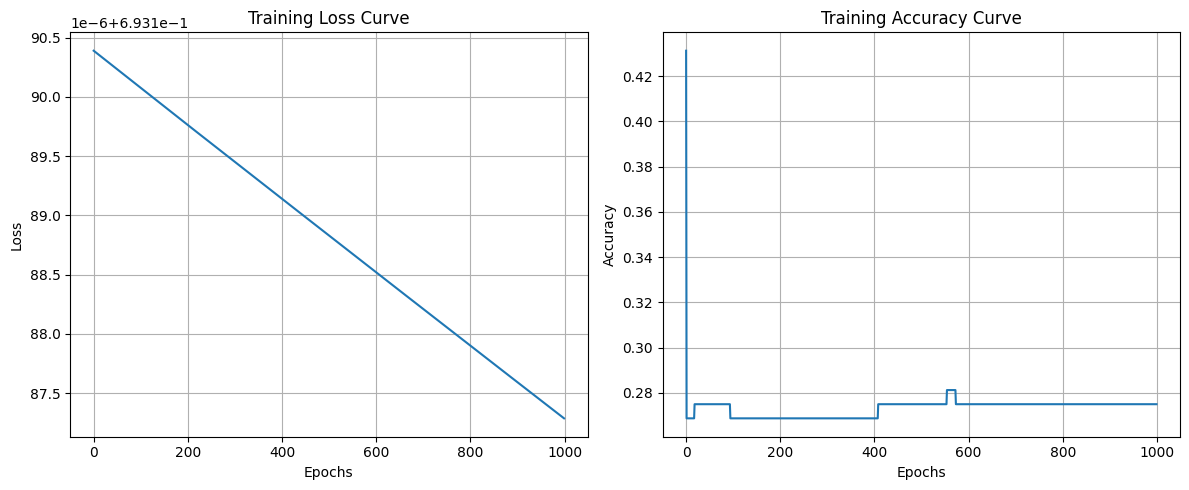

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

Now let us visualize the model's performance by plotting the decision boundary. To do this, we need a prediction function that utilizes the trained weights and biases. This function will take the input data and perform a forward pass to output predictions.

In [12]:
def predict(X, W1, b1, W2, b2):
    """
    Performs a forward pass to get predictions from the trained neural network.

    Args:
        X (np.ndarray): Input data. Shape: (n_features, n_samples)
        W1 (np.ndarray): Weights for the hidden layer.
        b1 (np.ndarray): Biases for the hidden layer.
        W2 (np.ndarray): Weights for the output layer.
        b2 (np.ndarray): Biases for the output layer.

    Returns:
        np.ndarray: Predicted class labels (0 or 1). Shape: (1, n_samples)
    """
    # Layer 1: Hidden Layer (ReLU activation)
    A1, _ = forward_pass(X, W1, b1, relu)

    # Layer 2: Output Layer (Sigmoid activation)
    A2, _ = forward_pass(A1, W2, b2, sigmoid)

    predictions = (A2 > 0.5).astype(int)
    return predictions

Now let us visualize the decision boundary of the trained model. This involves creating a meshgrid, using the predict function to classify each point, and then plotting the decision boundary along with the original data points.


Plotting decision boundary...


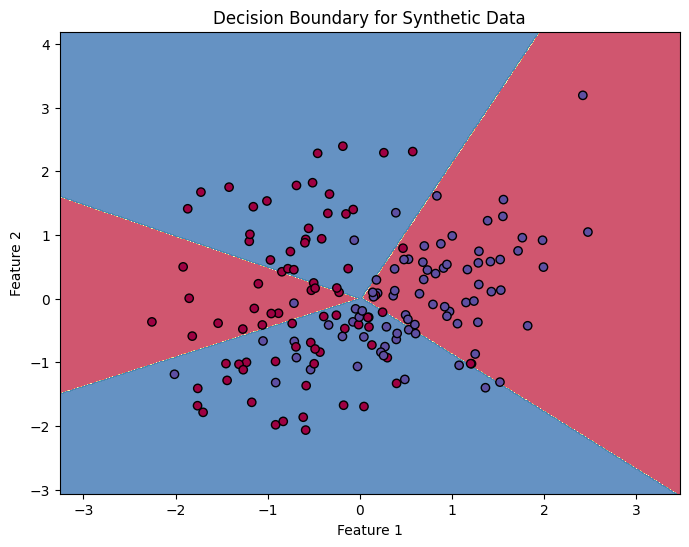

Test Accuracy: 0.3750
Synthetic data demonstration complete.


In [13]:
def plot_decision_boundary(X, Y, W1, b1, W2, b2):
    """
    Plots the decision boundary created by the neural network.
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.title('Decision Boundary for Synthetic Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the training set
print("\nPlotting decision boundary...")
plot_decision_boundary(X_train_nn, Y_train, W1, b1, W2, b2)

# Evaluate the model on the test set
predictions_test = predict(X_test_nn, W1, b1, W2, b2)
test_accuracy = np.mean(predictions_test == Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Synthetic data demonstration complete.")

## Real Data Application

Now let us import a real-world dataset from scikit-learn (e.g., Iris or digits dataset). We then preprocess the data as needed, adapt the neural network and training loop, and demonstrate the training process. We will also visualize the loss curve and evaluate the model's performance.

The first step is to load the Breast Cancer dataset from sklearn.datasets and separate it into features (X) and target (y).

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_real = data.data
Y_real = data.target
print(f"Features (X_real) shape: {X_real.shape}")
print(f"Target (Y_real) shape: {Y_real.shape}")

Features (X_real) shape: (569, 30)
Target (Y_real) shape: (569,)


The next step is to reshape the target variable Y_real to (1, n_samples) for consistency with the neural network's expected output format.

In [17]:
Y_real = Y_real.reshape(1, -1)

print(f"Reshaped Y_real shape: {Y_real.shape}")

Reshaped Y_real shape: (1, 569)


The next step is to split the dataset into training and testing sets using train_test_split, ensuring stratification and a random_state for reproducibility.

In [18]:
X_train_real, X_test_real, Y_train_real, Y_test_real = train_test_split(X_real, Y_real.T, test_size=0.2, random_state=42, stratify=Y_real.T)
Y_train_real = Y_train_real.T
Y_test_real = Y_test_real.T

print(f"X_train_real shape: {X_train_real.shape}")
print(f"Y_train_real shape: {Y_train_real.shape}")
print(f"X_test_real shape: {X_test_real.shape}")
print(f"Y_test_real shape: {Y_test_real.shape}")

X_train_real shape: (455, 30)
Y_train_real shape: (1, 455)
X_test_real shape: (114, 30)
Y_test_real shape: (1, 114)


Now let us standardize the features (X_train_real and X_test_real) using StandardScaler.

In [19]:
scaler_real = StandardScaler()
X_train_real_scaled = scaler_real.fit_transform(X_train_real)
X_test_real_scaled = scaler_real.transform(X_test_real)

print(f"X_train_real_scaled shape: {X_train_real_scaled.shape}")
print(f"X_test_real_scaled shape: {X_test_real_scaled.shape}")

X_train_real_scaled shape: (455, 30)
X_test_real_scaled shape: (114, 30)


In [20]:
X_train_real_nn = X_train_real_scaled.T
X_test_real_nn = X_test_real_scaled.T

print(f"Reshaped X_train_real_nn shape: {X_train_real_nn.shape}")
print(f"Reshaped X_test_real_nn shape: {X_test_real_nn.shape}")

Reshaped X_train_real_nn shape: (30, 455)
Reshaped X_test_real_nn shape: (30, 114)


The next step is to adapt the neural network parameters based on the new input features and output neurons of the real dataset. This involves re-initializing W1, b1, W2, and b2 with the correct shapes derived from `X_train_real_nn` and `Y_train_real`.

In [21]:
np.random.seed(3)
n_x_real = X_train_real_nn.shape[0]
n_h_real = 4
n_y_real = Y_train_real.shape[0]
W1_real = np.random.randn(n_h_real, n_x_real) * 0.01
b1_real = np.zeros((n_h_real, 1))
W2_real = np.random.randn(n_y_real, n_h_real) * 0.01
b2_real = np.zeros((n_y_real, 1))
print(f"\nInitialized Parameters for Real Data:")
print(f"W1_real shape: {W1_real.shape}")
print(f"b1_real shape: {b1_real.shape}")
print(f"W2_real shape: {W2_real.shape}")
print(f"b2_real shape: {b2_real.shape}")


Initialized Parameters for Real Data:
W1_real shape: (4, 30)
b1_real shape: (4, 1)
W2_real shape: (1, 4)
b2_real shape: (1, 1)


In [22]:
np.random.seed(4)
epochs_real = 2000
learning_rate_real = 0.005
m_real = X_train_real_nn.shape[1]
loss_history_real = []
accuracy_history_real = []

print(f"\nHyperparameters set for real data training:")
print(f"Epochs: {epochs_real}")
print(f"Learning Rate: {learning_rate_real}")
print(f"Number of training samples: {m_real}")
print("Loss and accuracy history lists initialized.")


Hyperparameters set for real data training:
Epochs: 2000
Learning Rate: 0.005
Number of training samples: 455
Loss and accuracy history lists initialized.


The next step is to implement the training loop for the real dataset. This involves performing forward and backward passes, calculating binary cross-entropy loss, performing backward pass, and updating parameters for each epoch. It also includes storing loss and accuracy values.

In [23]:
np.random.seed(5)
print(f"\nStarting training for real data with {epochs_real} epochs and learning rate {learning_rate_real}...")
for i in range(epochs_real):
    # Forward Pass
    # Layer 1: Hidden Layer (ReLU activation)
    # Input: X_train_real_nn (n_x_real, m_real)
    # W1_real: (n_h_real, n_x_real), b1_real: (n_h_real, 1)
    A1_real, Z1_real = forward_pass(X_train_real_nn, W1_real, b1_real, relu)
    # A1_real, Z1_real shapes: (n_h_real, m_real)
    # Layer 2: Output Layer (Sigmoid activation)
    # Input: A1_real (n_h_real, m_real)
    # W2_real: (n_y_real, n_h_real), b2_real: (n_y_real, 1)
    A2_real, Z2_real = forward_pass(A1_real, W2_real, b2_real, sigmoid)
    # A2_real, Z2_real shapes: (n_y_real, m_real)
    # Calculate Loss (Binary Cross-Entropy)
    # Ensure no log(0) issues
    epsilon = 1e-8
    loss_real = - (1 / m_real) * np.sum(Y_train_real * np.log(A2_real + epsilon) + (1 - Y_train_real) * np.log(1 - A2_real + epsilon))
    loss_history_real.append(loss_real)
    # Backward Pass
    # Calculate initial dZ2 for the output layer (BCE with Sigmoid)
    dZ2_real = (A2_real - Y_train_real) / m_real
    # dZ2_real shape: (n_y_real, m_real)
    # Compute gradients for the output layer directly from dZ2_real
    dW2_real = (1 / m_real) * np.dot(dZ2_real, A1_real.T)
    db2_real = (1 / m_real) * np.sum(dZ2_real, axis=1, keepdims=True)
    # Calculate dA1_real (gradient passed to the hidden layer)
    dA1_real = np.dot(W2_real.T, dZ2_real)
    # Backward pass for the hidden layer
    dA0_real, dW1_real, db1_real = backward_pass(
        dA=dA1_real, # dA1_real is the gradient from the subsequent layer
        Z=Z1_real,
        A_prev=X_train_real_nn,
        W=W1_real,
        activation_derivative_fn=relu_derivative,
        m=m_real
    )

    # Update Parameters
    W1_real = W1_real - learning_rate_real * dW1_real
    b1_real = b1_real - learning_rate_real * db1_real
    W2_real = W2_real - learning_rate_real * dW2_real
    b2_real = b2_real - learning_rate_real * db2_real
    # Calculate Training Accuracy
    predictions_real = (A2_real > 0.5).astype(int)
    accuracy_real = np.mean(predictions_real == Y_train_real)
    accuracy_history_real.append(accuracy_real)
    if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}/{epochs_real} - Loss: {loss_real:.4f}, Accuracy: {accuracy_real:.4f}")



Starting training for real data with 2000 epochs and learning rate 0.005...
Epoch 200/2000 - Loss: 0.6932, Accuracy: 0.5516
Epoch 400/2000 - Loss: 0.6931, Accuracy: 0.5626
Epoch 600/2000 - Loss: 0.6931, Accuracy: 0.5780
Epoch 800/2000 - Loss: 0.6931, Accuracy: 0.5846
Epoch 1000/2000 - Loss: 0.6930, Accuracy: 0.6088
Epoch 1200/2000 - Loss: 0.6930, Accuracy: 0.6110
Epoch 1400/2000 - Loss: 0.6929, Accuracy: 0.6044
Epoch 1600/2000 - Loss: 0.6929, Accuracy: 0.6088
Epoch 1800/2000 - Loss: 0.6929, Accuracy: 0.6110
Epoch 2000/2000 - Loss: 0.6928, Accuracy: 0.6176


In [24]:
print(f"Final Training Loss (Real Data): {loss_history_real[-1]:.4f}")
print(f"Final Training Accuracy (Real Data): {accuracy_history_real[-1]:.4f}")

Final Training Loss (Real Data): 0.6928
Final Training Accuracy (Real Data): 0.6176


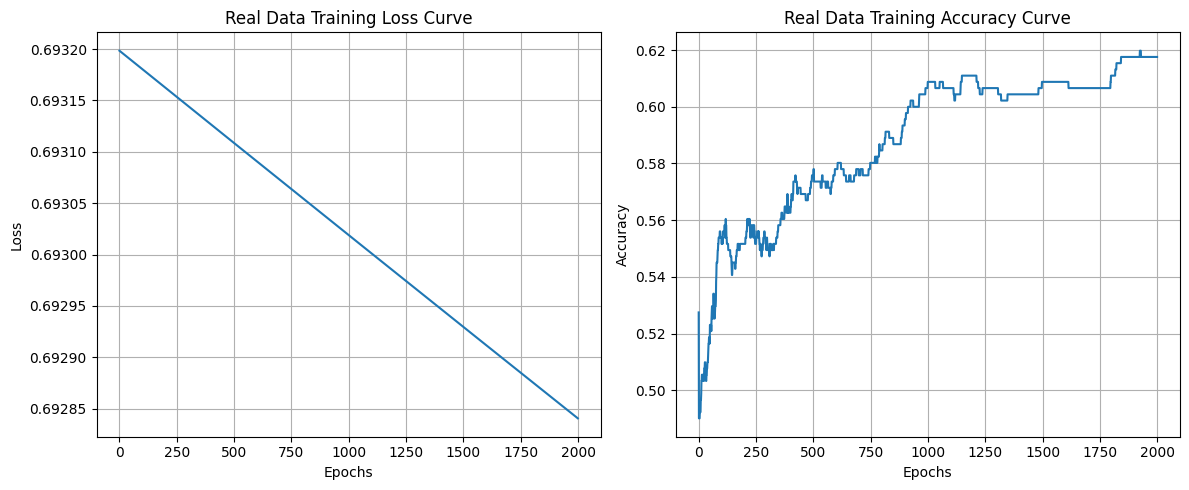

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_real)
plt.title('Real Data Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_real)
plt.title('Real Data Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
predictions_test_real = predict(X_test_real_nn, W1_real, b1_real, W2_real, b2_real)
test_accuracy_real = np.mean(predictions_test_real == Y_test_real)
print(f"\nTest Accuracy (Real Data): {test_accuracy_real:.4f}")


Test Accuracy (Real Data): 0.6404


## Exercises

**TO-DO #1:** The dataset we chose is almost linearly separable. To see the true power of an MLP, we need non-linear data.Use sklearn.datasets.make_moons(n_samples=200, noise=0.1) to generate a "moon" shaped dataset. Train the ManualMLP on this new dataset. Does the loss decrease as effectively? How does the decision boundary look? Also try and see how it performs on the IRIS dataset.

**TO-DO #2:** Hyperparameter Tuning. Try changing learning rate (both decreasing and increasing) and see how the losses change, do they converge faster? Does the accuracy improve further? Describe what happens to the loss curve in both cases. Look for "Exploding Gradients" or "Slow Convergence."

## Generate and Prepare Make-Moons Dataset

### Subtask:
Generate a 'moon' shaped dataset using `sklearn.datasets.make_moons(n_samples=200, noise=0.1)`. Split the data into training and testing sets, standardize the features, and reshape it to match the neural network's input format (n_features, n_samples).


**Reasoning**:
The first step is to generate the 'make_moons' dataset, reshape the target variable, split the data into training and testing sets, and then reshape the target variables of the splits to be consistent with the neural network's expected input format.



In [27]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Generate the 'make_moons' dataset
X_moons, Y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)
print(f"Original X_moons shape: {X_moons.shape}")
print(f"Original Y_moons shape: {Y_moons.shape}")

# 2. Reshape Y_moons to (1, n_samples)
Y_moons = Y_moons.reshape(1, -1)
print(f"Reshaped Y_moons shape: {Y_moons.shape}")

# 3. Split the data into training and testing sets
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split(
    X_moons, Y_moons.T, test_size=0.2, random_state=42, stratify=Y_moons.T
)

# 4. Reshape Y_train_moons and Y_test_moons back to (1, n_samples) after the split
Y_train_moons = Y_train_moons.T
Y_test_moons = Y_test_moons.T

print(f"X_train_moons shape after split: {X_train_moons.shape}")
print(f"Y_train_moons shape after split: {Y_train_moons.shape}")
print(f"X_test_moons shape after split: {X_test_moons.shape}")
print(f"Y_test_moons shape after split: {Y_test_moons.shape}")

# 5. Initialize a StandardScaler
scaler_moons = StandardScaler()

# 6. Fit and transform the training data, and transform the test data
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)
print(f"X_train_moons_scaled shape: {X_train_moons_scaled.shape}")
print(f"X_test_moons_scaled shape: {X_test_moons_scaled.shape}")

# 7. Transpose X to match the neural network's input format (n_features, n_samples)
X_train_moons_nn = X_train_moons_scaled.T
X_test_moons_nn = X_test_moons_scaled.T
print(f"Reshaped X_train_moons_nn shape: {X_train_moons_nn.shape}")
print(f"Reshaped X_test_moons_nn shape: {X_test_moons_nn.shape}")


Original X_moons shape: (200, 2)
Original Y_moons shape: (200,)
Reshaped Y_moons shape: (1, 200)
X_train_moons shape after split: (160, 2)
Y_train_moons shape after split: (1, 160)
X_test_moons shape after split: (40, 2)
Y_test_moons shape after split: (1, 40)
X_train_moons_scaled shape: (160, 2)
X_test_moons_scaled shape: (40, 2)
Reshaped X_train_moons_nn shape: (2, 160)
Reshaped X_test_moons_nn shape: (2, 40)


## Initialize MLP for Make-Moons Data

### Subtask:
Initialize the neural network parameters (W1_moons, b1_moons, W2_moons, b2_moons) with appropriate shapes corresponding to the generated 'make_moons' dataset.


**Reasoning**:
The next step is to initialize the neural network parameters (weights and biases) for the 'make_moons' dataset, ensuring their shapes match the input and output dimensions of the network. This involves setting a random seed, defining layer sizes, and using `np.random.randn` and `np.zeros` for initialization, followed by printing the shapes for verification.



In [28]:
np.random.seed(4)
n_x_moons = X_train_moons_nn.shape[0]  # Number of features in input layer
n_h_moons = 4  # Number of neurons in hidden layer
n_y_moons = Y_train_moons.shape[0] # Number of neurons in output layer (binary classification)

# Initialize parameters
W1_moons = np.random.randn(n_h_moons, n_x_moons) * 0.01
b1_moons = np.zeros((n_h_moons, 1))
W2_moons = np.random.randn(n_y_moons, n_h_moons) * 0.01
b2_moons = np.zeros((n_y_moons, 1))

print(f"\nInitialized Parameters for Make-Moons Data:")
print(f"W1_moons shape: {W1_moons.shape}")
print(f"b1_moons shape: {b1_moons.shape}")
print(f"W2_moons shape: {W2_moons.shape}")
print(f"b2_moons shape: {b2_moons.shape}")


Initialized Parameters for Make-Moons Data:
W1_moons shape: (4, 2)
b1_moons shape: (4, 1)
W2_moons shape: (1, 4)
b2_moons shape: (1, 1)


## Train MLP on Make-Moons Data

### Subtask:
Implement a training loop for the 'make_moons' dataset. This involves performing forward and backward passes, calculating binary cross-entropy loss and training accuracy for each epoch, and updating the weights and biases using gradient descent. Store the loss and accuracy history.


**Reasoning**:
The next step is to implement the training loop as described in the instructions, which includes setting hyperparameters, performing forward and backward passes, calculating loss and accuracy, and updating parameters.



In [29]:
np.random.seed(5)
epochs_moons = 1000
learning_rate_moons = 0.01
m_moons = X_train_moons_nn.shape[1]

loss_history_moons = []
accuracy_history_moons = []

print(f"\nStarting training for make_moons data with {epochs_moons} epochs and learning rate {learning_rate_moons}...")
for i in range(epochs_moons):
    # Forward Pass
    A1_moons, Z1_moons = forward_pass(X_train_moons_nn, W1_moons, b1_moons, relu)
    A2_moons, Z2_moons = forward_pass(A1_moons, W2_moons, b2_moons, sigmoid)

    # Calculate Loss (Binary Cross-Entropy)
    epsilon = 1e-8
    loss_moons = - (1 / m_moons) * np.sum(Y_train_moons * np.log(A2_moons + epsilon) + (1 - Y_train_moons) * np.log(1 - A2_moons + epsilon))
    loss_history_moons.append(loss_moons)

    # Backward Pass
    dZ2_moons = (A2_moons - Y_train_moons) / m_moons

    # Compute gradients for the output layer directly from dZ2_moons
    dW2_moons = (1 / m_moons) * np.dot(dZ2_moons, A1_moons.T)
    db2_momoons = (1 / m_moons) * np.sum(dZ2_moons, axis=1, keepdims=True)

    # Calculate dA1_moons (gradient passed to the hidden layer)
    dA1_moons = np.dot(W2_moons.T, dZ2_moons)

    # Backward pass for the hidden layer
    dA0_moons, dW1_moons, db1_moons = backward_pass(
        dA=dA1_moons,
        Z=Z1_moons,
        A_prev=X_train_moons_nn,
        W=W1_moons,
        activation_derivative_fn=relu_derivative,
        m=m_moons
    )

    # Update Parameters
    W1_moons = W1_moons - learning_rate_moons * dW1_moons
    b1_moons = b1_moons - learning_rate_moons * db1_moons
    W2_moons = W2_moons - learning_rate_moons * dW2_moons
    b2_moons = b2_moons - learning_rate_moons * db2_momoons # Corrected variable name here

    # Calculate Training Accuracy
    predictions_moons = (A2_moons > 0.5).astype(int)
    accuracy_moons = np.mean(predictions_moons == Y_train_moons)
    accuracy_history_moons.append(accuracy_moons)

    if (i + 1) % 100 == 0:
        print(f"Epoch {i+1}/{epochs_moons} - Loss: {loss_moons:.4f}, Accuracy: {accuracy_moons:.4f}")

print("Training complete for make_moons data.")
print(f"Final Training Loss (Make-Moons Data): {loss_history_moons[-1]:.4f}")
print(f"Final Training Accuracy (Make-Moons Data): {accuracy_history_moons[-1]:.4f}")


Starting training for make_moons data with 1000 epochs and learning rate 0.01...
Epoch 100/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 200/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 300/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 400/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 500/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 600/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 700/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 800/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 900/1000 - Loss: 0.6931, Accuracy: 0.8187
Epoch 1000/1000 - Loss: 0.6931, Accuracy: 0.8187
Training complete for make_moons data.
Final Training Loss (Make-Moons Data): 0.6931
Final Training Accuracy (Make-Moons Data): 0.8187


**Reasoning**:
The training loop for the 'make_moons' dataset has completed. The next step is to visualize the training loss and accuracy curves to evaluate the model's performance on this dataset, as requested by the task.



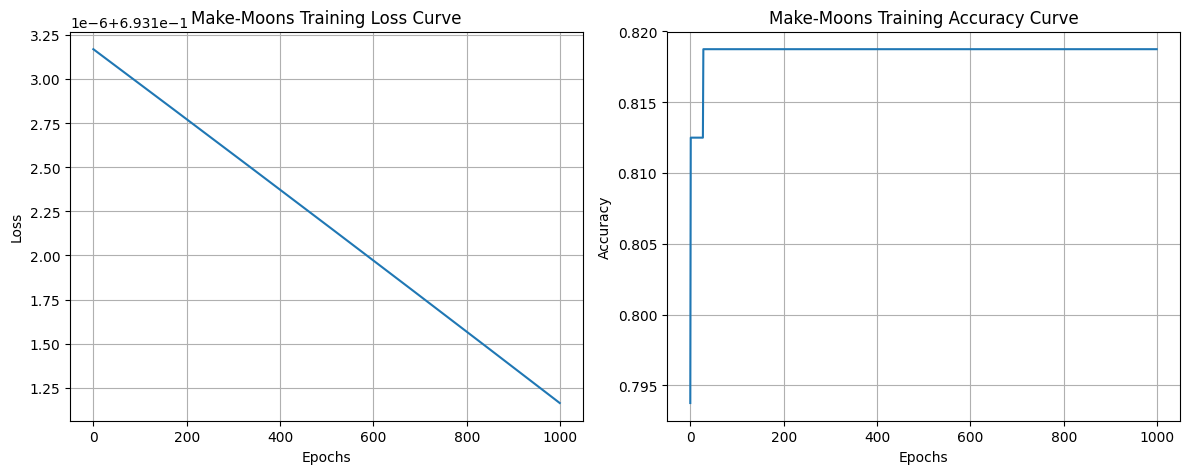

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_moons)
plt.title('Make-Moons Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_moons)
plt.title('Make-Moons Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
After plotting the training loss and accuracy curves, the next step is to visualize the decision boundary for the 'make_moons' dataset to understand how the model classifies data points in the feature space. Additionally, the model should be evaluated on the test set to determine its generalization performance.




Plotting decision boundary for Make-Moons data...


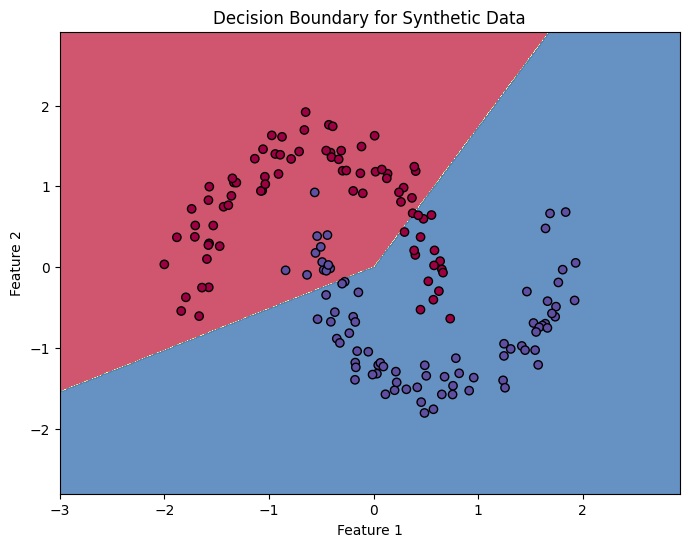

Test Accuracy (Make-Moons Data): 0.9000


In [31]:
print("\nPlotting decision boundary for Make-Moons data...")
plot_decision_boundary(X_train_moons_nn, Y_train_moons, W1_moons, b1_moons, W2_moons, b2_moons)

# Evaluate the model on the test set for make_moons
predictions_test_moons = predict(X_test_moons_nn, W1_moons, b1_moons, W2_moons, b2_moons)
test_accuracy_moons = np.mean(predictions_test_moons == Y_test_moons)
print(f"Test Accuracy (Make-Moons Data): {test_accuracy_moons:.4f}")

## Prepare and Train MLP on Iris Dataset

### Subtask:
Prepare the Iris dataset for binary classification by selecting two features and two classes. Split the data into training and testing sets, standardize the features, and reshape it to match the neural network's input format (n_features, n_samples).

**Reasoning**:
First, load the Iris dataset. Then, to perform binary classification, select two features and two specific classes from the dataset. This is a common practice when adapting a multi-class dataset for a binary classifier.



In [32]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print(f"Original Iris features (X_iris) shape: {X_iris.shape}")
print(f"Original Iris target (Y_iris) shape: {Y_iris.shape}")

# Select two features (e.g., petal length and petal width) and two classes (e.g., Setosa and Versicolor)
# For binary classification, let's pick classes 0 and 1 (Setosa and Versicolor)
# We'll use the first two features (sepal length, sepal width) for simplicity in visualization later
selected_features_indices = [0, 1] # Sepal Length and Sepal Width
selected_classes = [0, 1] # Setosa and Versicolor

# Filter data for selected classes
mask = np.isin(Y_iris, selected_classes)
X_iris_binary = X_iris[mask][:, selected_features_indices]
Y_iris_binary = Y_iris[mask]

# Map classes to 0 and 1 if they are not already. In this case, 0 and 1 are already correct.
Y_iris_binary = Y_iris_binary.reshape(1, -1)

print(f"\nFiltered X_iris_binary shape: {X_iris_binary.shape}")
print(f"Filtered Y_iris_binary shape: {Y_iris_binary.shape}")

Original Iris features (X_iris) shape: (150, 4)
Original Iris target (Y_iris) shape: (150,)

Filtered X_iris_binary shape: (100, 2)
Filtered Y_iris_binary shape: (1, 100)


**Reasoning**:
Now, the filtered Iris dataset needs to be split into training and testing sets, then its features standardized, and finally reshaped to conform to the neural network's expected input dimensions, similar to the previous datasets.



In [33]:
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(
    X_iris_binary, Y_iris_binary.T, test_size=0.2, random_state=42, stratify=Y_iris_binary.T
)

Y_train_iris = Y_train_iris.T
Y_test_iris = Y_test_iris.T

print(f"\nX_train_iris shape after split: {X_train_iris.shape}")
print(f"Y_train_iris shape after split: {Y_train_iris.shape}")
print(f"X_test_iris shape after split: {X_test_iris.shape}")
print(f"Y_test_iris shape after split: {Y_test_iris.shape}")

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print(f"X_train_iris_scaled shape: {X_train_iris_scaled.shape}")
print(f"X_test_iris_scaled shape: {X_test_iris_scaled.shape}")

X_train_iris_nn = X_train_iris_scaled.T
X_test_iris_nn = X_test_iris_scaled.T

print(f"Reshaped X_train_iris_nn shape: {X_train_iris_nn.shape}")
print(f"Reshaped X_test_iris_nn shape: {X_test_iris_nn.shape}")


X_train_iris shape after split: (80, 2)
Y_train_iris shape after split: (1, 80)
X_test_iris shape after split: (20, 2)
Y_test_iris shape after split: (1, 20)
X_train_iris_scaled shape: (80, 2)
X_test_iris_scaled shape: (20, 2)
Reshaped X_train_iris_nn shape: (2, 80)
Reshaped X_test_iris_nn shape: (2, 20)


**Reasoning**:
The next step is to initialize the neural network parameters (weights and biases) for the Iris dataset, ensuring their shapes match the input and output dimensions of the network. This involves setting a random seed, defining layer sizes, and using `np.random.randn` and `np.zeros` for initialization, followed by printing the shapes for verification.



In [34]:
np.random.seed(6)
n_x_iris = X_train_iris_nn.shape[0]  # Number of features in input layer
n_h_iris = 4  # Number of neurons in hidden layer (can be adjusted)
n_y_iris = Y_train_iris.shape[0]  # Number of neurons in output layer (binary classification)

# Initialize parameters
W1_iris = np.random.randn(n_h_iris, n_x_iris) * 0.01
b1_iris = np.zeros((n_h_iris, 1))
W2_iris = np.random.randn(n_y_iris, n_h_iris) * 0.01
b2_iris = np.zeros((n_y_iris, 1))

print(f"\nInitialized Parameters for Iris Data:")
print(f"W1_iris shape: {W1_iris.shape}")
print(f"b1_iris shape: {b1_iris.shape}")
print(f"W2_iris shape: {W2_iris.shape}")
print(f"b2_iris shape: {b2_iris.shape}")


Initialized Parameters for Iris Data:
W1_iris shape: (4, 2)
b1_iris shape: (4, 1)
W2_iris shape: (1, 4)
b2_iris shape: (1, 1)


### Subtask:
Implement a training loop for the Iris dataset. This involves performing forward and backward passes, calculating binary cross-entropy loss and training accuracy for each epoch, and updating the weights and biases using gradient descent. Store the loss and accuracy history.

**Reasoning**:
Now that the Iris dataset is prepared and the network parameters are initialized, the next step is to implement the training loop for this dataset. This involves defining hyperparameters, performing forward and backward passes, calculating loss and accuracy, and updating the weights and biases over several epochs, similar to the previous datasets.



In [35]:
np.random.seed(7)
epochs_iris = 2000
learning_rate_iris = 0.005
m_iris = X_train_iris_nn.shape[1]

loss_history_iris = []
accuracy_history_iris = []

print(f"\nStarting training for Iris data with {epochs_iris} epochs and learning rate {learning_rate_iris}...")
for i in range(epochs_iris):
    # Forward Pass
    A1_iris, Z1_iris = forward_pass(X_train_iris_nn, W1_iris, b1_iris, relu)
    A2_iris, Z2_iris = forward_pass(A1_iris, W2_iris, b2_iris, sigmoid)

    # Calculate Loss (Binary Cross-Entropy)
    epsilon = 1e-8
    loss_iris = - (1 / m_iris) * np.sum(Y_train_iris * np.log(A2_iris + epsilon) + (1 - Y_train_iris) * np.log(1 - A2_iris + epsilon))
    loss_history_iris.append(loss_iris)

    # Backward Pass
    dZ2_iris = (A2_iris - Y_train_iris) / m_iris

    dW2_iris = (1 / m_iris) * np.dot(dZ2_iris, A1_iris.T)
    db2_iris = (1 / m_iris) * np.sum(dZ2_iris, axis=1, keepdims=True)

    dA1_iris = np.dot(W2_iris.T, dZ2_iris)

    dA0_iris, dW1_iris, db1_iris = backward_pass(
        dA=dA1_iris,
        Z=Z1_iris,
        A_prev=X_train_iris_nn,
        W=W1_iris,
        activation_derivative_fn=relu_derivative,
        m=m_iris
    )

    # Update Parameters
    W1_iris = W1_iris - learning_rate_iris * dW1_iris
    b1_iris = b1_iris - learning_rate_iris * db1_iris
    W2_iris = W2_iris - learning_rate_iris * dW2_iris
    b2_iris = b2_iris - learning_rate_iris * db2_iris

    # Calculate Training Accuracy
    predictions_iris = (A2_iris > 0.5).astype(int)
    accuracy_iris = np.mean(predictions_iris == Y_train_iris)
    accuracy_history_iris.append(accuracy_iris)

    if (i + 1) % 200 == 0:
        print(f"Epoch {i+1}/{epochs_iris} - Loss: {loss_iris:.4f}, Accuracy: {accuracy_iris:.4f}")

print("Training complete for Iris data.")
print(f"Final Training Loss (Iris Data): {loss_history_iris[-1]:.4f}")
print(f"Final Training Accuracy (Iris Data): {accuracy_history_iris[-1]:.4f}")


Starting training for Iris data with 2000 epochs and learning rate 0.005...
Epoch 200/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 400/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 600/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 800/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 1000/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 1200/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 1400/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 1600/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 1800/2000 - Loss: 0.6933, Accuracy: 0.5000
Epoch 2000/2000 - Loss: 0.6933, Accuracy: 0.5000
Training complete for Iris data.
Final Training Loss (Iris Data): 0.6933
Final Training Accuracy (Iris Data): 0.5000


**Reasoning**:
After the training loop for the Iris dataset, the next step is to visualize the training loss and accuracy curves to evaluate the model's performance on this dataset, as requested by the task.



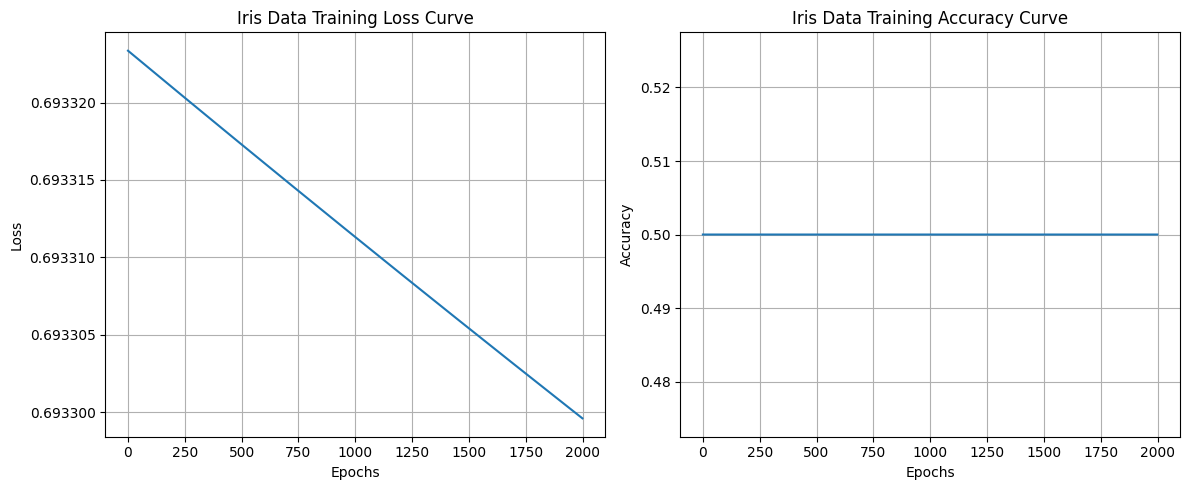

In [36]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_iris)
plt.title('Iris Data Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_iris)
plt.title('Iris Data Training Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
After plotting the training loss and accuracy curves for the Iris dataset, the next step is to visualize its decision boundary and evaluate the model's test accuracy, similar to the process used for the 'make_moons' dataset.




Plotting decision boundary for Iris data...


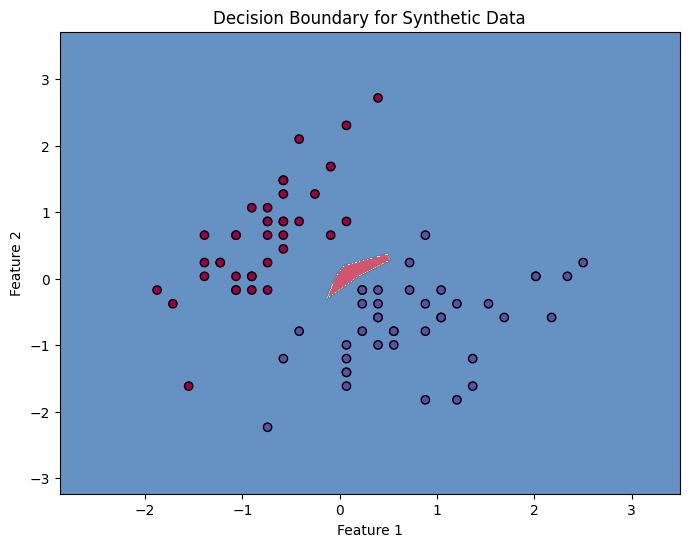

Test Accuracy (Iris Data): 0.4500


In [37]:
print("\nPlotting decision boundary for Iris data...")
plot_decision_boundary(X_train_iris_nn, Y_train_iris, W1_iris, b1_iris, W2_iris, b2_iris)

# Evaluate the model on the test set for Iris
predictions_test_iris = predict(X_test_iris_nn, W1_iris, b1_iris, W2_iris, b2_iris)
test_accuracy_iris = np.mean(predictions_test_iris == Y_test_iris)
print(f"Test Accuracy (Iris Data): {test_accuracy_iris:.4f}")

## Hyperparameter Tuning on Original Synthetic Data

### Subtask:
Retrain the MLP on the original synthetic dataset (generated with `make_classification`) with both an increased and a decreased learning rate. Analyze and describe the impact on loss curves and identify any issues like 'Exploding Gradients' or 'Slow Convergence'.

**Reasoning**:
First, for the hyperparameter tuning subtask, I need to re-initialize the neural network parameters for the original synthetic dataset (generated with `make_classification`) to ensure a fresh start for the tuning process. This is crucial before training with different learning rates.



In [38]:
np.random.seed(1)

# Re-initialize parameters for the original synthetic data for tuning
# This uses the n_x, n_h, n_y defined earlier for the original synthetic data
W1_tuned = np.random.randn(n_h, n_x) * 0.01
b1_tuned = np.zeros((n_h, 1))
W2_tuned = np.random.randn(n_y, n_h) * 0.01
b2_tuned = np.zeros((n_y, 1))

print(f"\nRe-initialized Parameters for Hyperparameter Tuning (Original Synthetic Data):")
print(f"W1_tuned shape: {W1_tuned.shape}")
print(f"b1_tuned shape: {b1_tuned.shape}")
print(f"W2_tuned shape: {W2_tuned.shape}")
print(f"b2_tuned shape: {b2_tuned.shape}")


Re-initialized Parameters for Hyperparameter Tuning (Original Synthetic Data):
W1_tuned shape: (4, 2)
b1_tuned shape: (4, 1)
W2_tuned shape: (1, 4)
b2_tuned shape: (1, 1)


**Reasoning**:
Now that the parameters are re-initialized, I will implement the training loop for the original synthetic data using an increased learning rate to observe its impact on the loss curve and convergence.



In [39]:
np.random.seed(8)
epochs_tuned = 1000
learning_rate_high = 0.1 # Increased learning rate
m_tuned = X_train_nn.shape[1]

loss_history_high_lr = []
accuracy_history_high_lr = []

# Use the re-initialized W1_tuned, b1_tuned, W2_tuned, b2_tuned
W1_high_lr = np.copy(W1_tuned)
b1_high_lr = np.copy(b1_tuned)
W2_high_lr = np.copy(W2_tuned)
b2_high_lr = np.copy(b2_tuned)

print(f"\nStarting training for original synthetic data with high learning rate ({learning_rate_high})...")
for i in range(epochs_tuned):
    # Forward Pass
    A1_high_lr, Z1_high_lr = forward_pass(X_train_nn, W1_high_lr, b1_high_lr, relu)
    A2_high_lr, Z2_high_lr = forward_pass(A1_high_lr, W2_high_lr, b2_high_lr, sigmoid)

    # Calculate Loss (Binary Cross-Entropy)
    epsilon = 1e-8
    loss_high_lr = - (1 / m_tuned) * np.sum(Y_train * np.log(A2_high_lr + epsilon) + (1 - Y_train) * np.log(1 - A2_high_lr + epsilon))
    loss_history_high_lr.append(loss_high_lr)

    # Backward Pass
    dZ2_high_lr = (A2_high_lr - Y_train) / m_tuned

    dW2_high_lr = (1 / m_tuned) * np.dot(dZ2_high_lr, A1_high_lr.T)
    db2_high_lr = (1 / m_tuned) * np.sum(dZ2_high_lr, axis=1, keepdims=True)

    dA1_high_lr = np.dot(W2_high_lr.T, dZ2_high_lr)

    _, dW1_high_lr, db1_high_lr = backward_pass(
        dA=dA1_high_lr,
        Z=Z1_high_lr,
        A_prev=X_train_nn,
        W=W1_high_lr,
        activation_derivative_fn=relu_derivative,
        m=m_tuned
    )

    # Update Parameters
    W1_high_lr = W1_high_lr - learning_rate_high * dW1_high_lr
    b1_high_lr = b1_high_lr - learning_rate_high * db1_high_lr
    W2_high_lr = W2_high_lr - learning_rate_high * dW2_high_lr
    b2_high_lr = b2_high_lr - learning_rate_high * db2_high_lr

    # Calculate Training Accuracy
    predictions_high_lr = (A2_high_lr > 0.5).astype(int)
    accuracy_high_lr = np.mean(predictions_high_lr == Y_train)
    accuracy_history_high_lr.append(accuracy_high_lr)

    if (i + 1) % 100 == 0:
        print(f"Epoch {i+1}/{epochs_tuned} - Loss: {loss_high_lr:.4f}, Accuracy: {accuracy_high_lr:.4f}")

print("Training complete for high learning rate.")
print(f"Final Training Loss (High LR): {loss_history_high_lr[-1]:.4f}")
print(f"Final Training Accuracy (High LR): {accuracy_history_high_lr[-1]:.4f}")


Starting training for original synthetic data with high learning rate (0.1)...
Epoch 100/1000 - Loss: 0.6932, Accuracy: 0.2750
Epoch 200/1000 - Loss: 0.6932, Accuracy: 0.2875
Epoch 300/1000 - Loss: 0.6932, Accuracy: 0.3250
Epoch 400/1000 - Loss: 0.6932, Accuracy: 0.4875
Epoch 500/1000 - Loss: 0.6932, Accuracy: 0.4813
Epoch 600/1000 - Loss: 0.6932, Accuracy: 0.4938
Epoch 700/1000 - Loss: 0.6932, Accuracy: 0.5000
Epoch 800/1000 - Loss: 0.6932, Accuracy: 0.5250
Epoch 900/1000 - Loss: 0.6932, Accuracy: 0.5500
Epoch 1000/1000 - Loss: 0.6932, Accuracy: 0.5750
Training complete for high learning rate.
Final Training Loss (High LR): 0.6932
Final Training Accuracy (High LR): 0.5750


**Reasoning**:
Now, to continue the hyperparameter tuning subtask, I will implement a training loop for the original synthetic data using a decreased learning rate to observe its impact on the loss curve and convergence, and compare it with the high learning rate results.



In [40]:
np.random.seed(9)
epochs_tuned = 1000
learning_rate_low = 0.0001 # Decreased learning rate
m_tuned = X_train_nn.shape[1]

loss_history_low_lr = []
accuracy_history_low_lr = []

# Use the re-initialized W1_tuned, b1_tuned, W2_tuned, b2_tuned for a fresh start
W1_low_lr = np.copy(W1_tuned)
b1_low_lr = np.copy(b1_tuned)
W2_low_lr = np.copy(W2_tuned)
b2_low_lr = np.copy(b2_tuned)

print(f"\nStarting training for original synthetic data with low learning rate ({learning_rate_low})...")
for i in range(epochs_tuned):
    # Forward Pass
    A1_low_lr, Z1_low_lr = forward_pass(X_train_nn, W1_low_lr, b1_low_lr, relu)
    A2_low_lr, Z2_low_lr = forward_pass(A1_low_lr, W2_low_lr, b2_low_lr, sigmoid)

    # Calculate Loss (Binary Cross-Entropy)
    epsilon = 1e-8
    loss_low_lr = - (1 / m_tuned) * np.sum(Y_train * np.log(A2_low_lr + epsilon) + (1 - Y_train) * np.log(1 - A2_low_lr + epsilon))
    loss_history_low_lr.append(loss_low_lr)

    # Backward Pass
    dZ2_low_lr = (A2_low_lr - Y_train) / m_tuned

    dW2_low_lr = (1 / m_tuned) * np.dot(dZ2_low_lr, A1_low_lr.T)
    db2_low_lr = (1 / m_tuned) * np.sum(dZ2_low_lr, axis=1, keepdims=True)

    dA1_low_lr = np.dot(W2_low_lr.T, dZ2_low_lr)

    _, dW1_low_lr, db1_low_lr = backward_pass(
        dA=dA1_low_lr,
        Z=Z1_low_lr,
        A_prev=X_train_nn,
        W=W1_low_lr,
        activation_derivative_fn=relu_derivative,
        m=m_tuned
    )

    # Update Parameters
    W1_low_lr = W1_low_lr - learning_rate_low * dW1_low_lr
    b1_low_lr = b1_low_lr - learning_rate_low * db1_low_lr
    W2_low_lr = W2_low_lr - learning_rate_low * dW2_low_lr
    b2_low_lr = b2_low_lr - learning_rate_low * db2_low_lr

    # Calculate Training Accuracy
    predictions_low_lr = (A2_low_lr > 0.5).astype(int)
    accuracy_low_lr = np.mean(predictions_low_lr == Y_train)
    accuracy_history_low_lr.append(accuracy_low_lr)

    if (i + 1) % 100 == 0:
        print(f"Epoch {i+1}/{epochs_tuned} - Loss: {loss_low_lr:.4f}, Accuracy: {accuracy_low_lr:.4f}")

print("Training complete for low learning rate.")
print(f"Final Training Loss (Low LR): {loss_history_low_lr[-1]:.4f}")
print(f"Final Training Accuracy (Low LR): {accuracy_history_low_lr[-1]:.4f}")



Starting training for original synthetic data with low learning rate (0.0001)...
Epoch 100/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 200/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 300/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 400/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 500/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 600/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 700/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 800/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 900/1000 - Loss: 0.6932, Accuracy: 0.2687
Epoch 1000/1000 - Loss: 0.6932, Accuracy: 0.2687
Training complete for low learning rate.
Final Training Loss (Low LR): 0.6932
Final Training Accuracy (Low LR): 0.2687


**Reasoning**:
Now that training for both high and low learning rates is complete, the next step in hyperparameter tuning is to visualize and compare their loss curves to understand the impact of different learning rates on training dynamics.



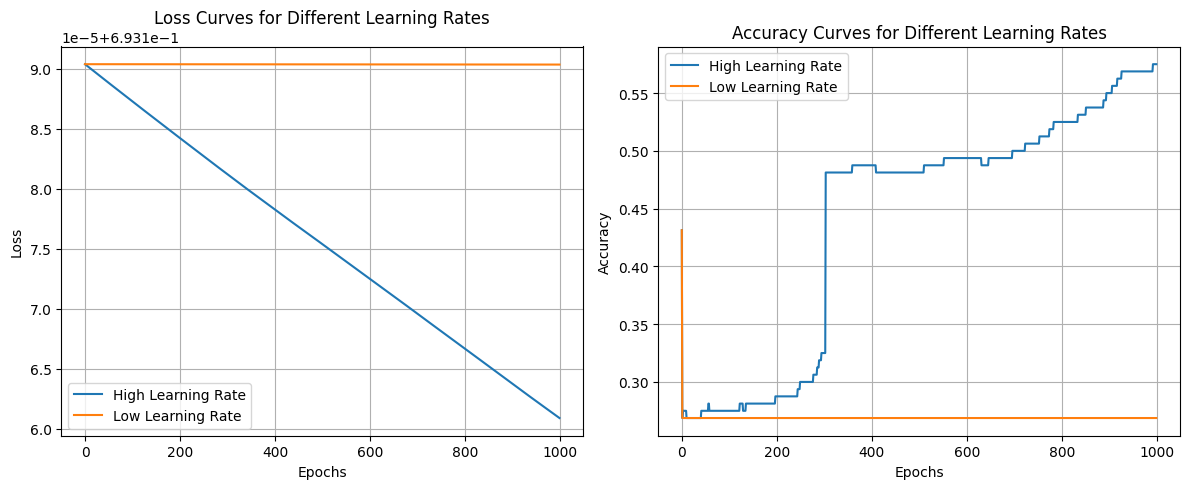

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_high_lr, label='High Learning Rate')
plt.plot(loss_history_low_lr, label='Low Learning Rate')
plt.title('Loss Curves for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_high_lr, label='High Learning Rate')
plt.plot(accuracy_history_low_lr, label='Low Learning Rate')
plt.title('Accuracy Curves for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()